In [68]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('classic')

In [51]:
p1 = pd.read_csv("profile_5ms_1.txt", dtype={'n1': 'int', 'n2': 'int', 'n3': 'int', 'alg': 'str', 'wt_c1': 'float', 'tat_c1': 'float', 'wt_c2': 'float', 'tat_c2': 'float', 'wt_c3': 'float', 'tat_c3': 'float'})
p2 = pd.read_csv("profile_5ms_2.txt", dtype={'n1': 'int', 'n2': 'int', 'n3': 'int', 'alg': 'str', 'wt_c1': 'float', 'tat_c1': 'float', 'wt_c2': 'float', 'tat_c2': 'float', 'wt_c3': 'float', 'tat_c3': 'float'})

In [52]:
columns = ['n1', 'n2', 'n3', 'alg', 'wt_c1', 'tat_c1', 'wt_c2', 'tat_c2', 'wt_c3', 'tat_c3', 'x']
p1.columns = columns
p2.columns = columns
p1 = p1[['n1', 'n2', 'n3', 'alg', 'wt_c1', 'tat_c1', 'wt_c2', 'tat_c2', 'wt_c3', 'tat_c3']]
p2 = p2[['n1', 'n2', 'n3', 'alg', 'wt_c1', 'tat_c1', 'wt_c2', 'tat_c2', 'wt_c3', 'tat_c3']]
p1 = p1.convert_dtypes()
p2 = p2.convert_dtypes()

In [73]:
rr_n1_1 = p1.loc[(p1['n2']==100000) & (p1['n3']==100000) & (p1['alg']==' RR')]
rr_n1_2 = p2.loc[(p2['n2']==100000) & (p2['n3']==100000) & (p2['alg']==' RR')]

In [28]:
p2.loc[(p1['n2']==100000) & (p1['n3']==100000)]

,n1,n2,n3,alg,wt_c1,tat_c1,wt_c2,tat_c2,wt_c3,tat_c3
56,10,100000,100000,RR,0.016,50.291,187.454,413.422,87.149,103.751
57,10,100000,100000,FCFS,0.019,25.172,25.180,1116.009,1116.035,1133.680
128,100,100000,100000,RR,0.019,54.345,176.683,397.659,95.073,111.569
129,100,100000,100000,FCFS,0.025,32.519,32.541,1246.781,1246.787,1283.752
200,1000,100000,100000,RR,0.060,24.699,152.630,367.703,53.573,66.620
201,1000,100000,100000,FCFS,0.024,26.570,26.574,931.530,931.592,949.022
272,10000,100000,100000,RR,0.020,35.373,183.808,381.269,74.334,101.973
273,10000,100000,100000,FCFS,0.023,32.911,32.918,1177.109,1177.131,1217.823
344,100000,100000,100000,RR,0.090,35.670,198.117,371.034,78.272,103.942
345,100000,100000,100000,FCFS,0.025,35.509,35.515,1088.745,1088.749,1115.693


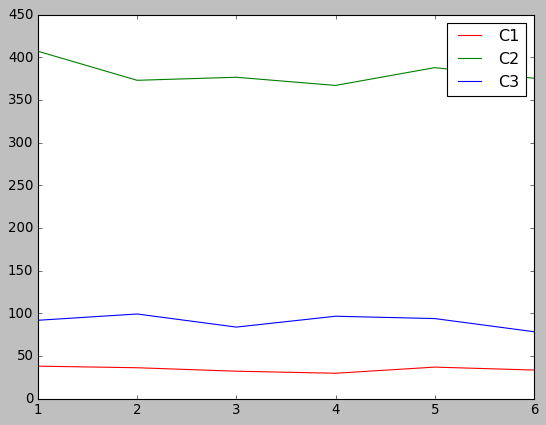

In [75]:
plt.plot([1,2,3,4,5,6], list((rr_n1_1['tat_c1'] + rr_n1_2['tat_c1']) / 2), color='r', label='C1')
plt.plot([1,2,3,4,5,6], list((rr_n1_1['tat_c2'] + rr_n1_2['tat_c2']) / 2), color='g', label='C2')
plt.plot([1,2,3,4,5,6], list((rr_n1_1['tat_c3'] + rr_n1_2['tat_c3']) / 2), color='b', label='C3')
plt.legend()

In [60]:
list(rr_n1['tat_c1'])

[25.639, 17.885, 39.408, 23.955, 38.024, 26.873]

In [82]:
procs = ['c1', 'c2', 'c3']
metrics = ['tat', 'wt']
algs = [' RR', ' FCFS']
variations = ['n1', 'n2', 'n3']
fixtime = 10000

In [87]:
## RR
for metric in metrics:
    sl1 = p1.loc[(p1['n2']==fixtime) & (p1['n3']==fixtime) & (p1['alg']==' RR')]
    sl2 = p2.loc[(p2['n2']==fixtime) & (p2['n3']==fixtime) & (p2['alg']==' RR')]
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c1'] + sl2[metric+'_c1']) / 2), color='r', label='C1')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c2'] + sl2[metric+'_c2']) / 2), color='g', label='C2')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c3'] + sl2[metric+'_c3']) / 2), color='b', label='C3')
    plt.title("Round Robin")
    plt.xlabel("log(n1)")
    plt.ylabel(metric.upper() + ' in ms')
    plt.legend()
    plt.savefig("rr_"+metric+"_n1")
    plt.clf()
    
    sl1 = p1.loc[(p1['n1']==fixtime) & (p1['n3']==fixtime) & (p1['alg']==' RR')]
    sl2 = p2.loc[(p2['n1']==fixtime) & (p2['n3']==fixtime) & (p2['alg']==' RR')]
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c1'] + sl2[metric+'_c1']) / 2), color='r', label='C1')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c2'] + sl2[metric+'_c2']) / 2), color='g', label='C2')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c3'] + sl2[metric+'_c3']) / 2), color='b', label='C3')
    plt.title("Round Robin")
    plt.xlabel("log(n2)")
    plt.ylabel(metric.upper() + ' in ms')
    plt.legend()
    plt.savefig("rr_"+metric+"_n2")
    plt.clf()
    
    sl1 = p1.loc[(p1['n1']==fixtime) & (p1['n2']==fixtime) & (p1['alg']==' RR')]
    sl2 = p2.loc[(p2['n1']==fixtime) & (p2['n2']==fixtime) & (p2['alg']==' RR')]
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c1'] + sl2[metric+'_c1']) / 2), color='r', label='C1')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c2'] + sl2[metric+'_c2']) / 2), color='g', label='C2')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c3'] + sl2[metric+'_c3']) / 2), color='b', label='C3')
    plt.title("Round Robin")
    plt.xlabel("log(n3)")
    plt.ylabel(metric.upper() + ' in ms')
    plt.legend()
    plt.savefig("rr_"+metric+"_n3")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [88]:
## FCFS
for metric in metrics:
    sl1 = p1.loc[(p1['n2']==fixtime) & (p1['n3']==fixtime) & (p1['alg']==' FCFS')]
    sl2 = p2.loc[(p2['n2']==fixtime) & (p2['n3']==fixtime) & (p2['alg']==' FCFS')]
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c1'] + sl2[metric+'_c1']) / 2), color='r', label='C1')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c2'] + sl2[metric+'_c2']) / 2), color='g', label='C2')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c3'] + sl2[metric+'_c3']) / 2), color='b', label='C3')
    plt.title("First Come First Serve")
    plt.xlabel("log(n1)")
    plt.ylabel(metric.upper() + ' in ms')
    plt.legend()
    plt.savefig("fcfs_"+metric+"_n1")
    plt.clf()
    
    sl1 = p1.loc[(p1['n1']==fixtime) & (p1['n3']==fixtime) & (p1['alg']==' FCFS')]
    sl2 = p2.loc[(p2['n1']==fixtime) & (p2['n3']==fixtime) & (p2['alg']==' FCFS')]
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c1'] + sl2[metric+'_c1']) / 2), color='r', label='C1')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c2'] + sl2[metric+'_c2']) / 2), color='g', label='C2')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c3'] + sl2[metric+'_c3']) / 2), color='b', label='C3')
    plt.title("First Come First Serve")
    plt.xlabel("log(n2)")
    plt.ylabel(metric.upper() + ' in ms')
    plt.legend()
    plt.savefig("fcfs_"+metric+"_n2")
    plt.clf()
    
    sl1 = p1.loc[(p1['n1']==fixtime) & (p1['n2']==fixtime) & (p1['alg']==' FCFS')]
    sl2 = p2.loc[(p2['n1']==fixtime) & (p2['n2']==fixtime) & (p2['alg']==' FCFS')]
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c1'] + sl2[metric+'_c1']) / 2), color='r', label='C1')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c2'] + sl2[metric+'_c2']) / 2), color='g', label='C2')
    plt.plot([1,2,3,4,5,6], list((sl1[metric+'_c3'] + sl2[metric+'_c3']) / 2), color='b', label='C3')
    plt.title("First Come First Serve")
    plt.xlabel("log(n3)")
    plt.ylabel(metric.upper() + ' in ms')
    plt.legend()
    plt.savefig("fcfs_"+metric+"_n3")
    plt.clf()

<Figure size 640x480 with 0 Axes>